# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:

import matplotlib.pyplot as plt
import random
import numpy as np
import random
import cv2

import tensorflow as tf

from PIL import Image, ImageEnhance
# Visualizations will be shown in the notebook.
%matplotlib inline


In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
# Load name of id
with open("signnames.csv", "r") as f:
    signnames = f.read()
id_to_name = { int(line.split(",")[0]):line.split(",")[1] for line in signnames.split("\n")[1:] if len(line) > 0}

print("\nLoad data file completed.")


Load data file completed.


In [3]:

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


Image X_train.shape : (34799, 32, 32, 3)
Image X_valid.shape : (4410, 32, 32, 3)
Image X_test.shape  : (12630, 32, 32, 3)
Labels y_train.shape: (34799,)
Labels y_valid.shape: (4410,)
Labels y_test.shape : (12630,)
y_test[:10]= [16  1 38 33 11 38 18 12 25 35]

signnames.csv content:
0, Speed limit (20km/h)
1, Speed limit (30km/h)
2, Speed limit (50km/h)
3, Speed limit (60km/h)
4, Speed limit (70km/h)
5, Speed limit (80km/h)
6, End of speed limit (80km/h)
7, Speed limit (100km/h)
8, Speed limit (120km/h)
9, No passing
10, No passing for vehicles over 3.5 metric tons
11, Right-of-way at the next intersection
12, Priority road
13, Yield
14, Stop
15, No vehicles
16, Vehicles over 3.5 metric tons prohibited
17, No entry
18, General caution
19, Dangerous curve to the left
20, Dangerous curve to the right
21, Double curve
22, Bumpy road
23, Slippery road
24, Road narrows on the right
25, Road work
26, Traffic signals
27, Pedestrians
28, Children crossing
29, Bicycles crossing
30, Beware of ice

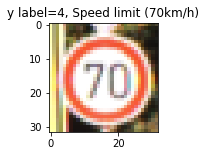

In [4]:
print("Image X_train.shape : {}".format(X_train.shape))
print("Image X_valid.shape : {}".format(X_valid.shape))
print("Image X_test.shape  : {}".format(X_test.shape))

print("Labels y_train.shape: {}".format(y_train.shape))
print("Labels y_valid.shape: {}".format(y_valid.shape))
print("Labels y_test.shape : {}".format(y_test.shape))
print ('y_test[:10]=', y_test[:10])
print()

print("signnames.csv content:")
for i in range(len(id_to_name)):
    print ("%d, %s" %( i, id_to_name[i]))
################# show an example image ###########
index = 7794
X_img = X_train[index]

plt.figure(figsize=(2,2))
plt.imshow(X_img)
img_title = 'y label=' +  str(y_train[index]) + ', ' + id_to_name[y_train[index]]
plt.title(img_title)

print()
print("X_img.shape: ", X_img.shape)
print('X_img[:1, :5, :]=\n', X_img[:1, :5, :])


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
#n_classes = 43 #see signnames.csv
#n_classes = len(np.unique(y_train))
n_classes = len(set(y_train))   

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Training images: [23256, 22057, 15284, 31832, 17850, 33877, 1996, 25231, 24009, 4024, 14359, 12847]


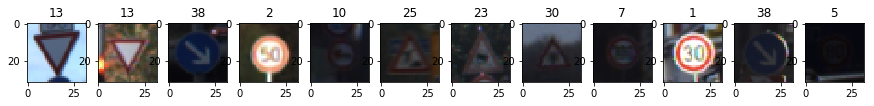

Validation images: [23256, 22057, 15284, 31832, 17850, 33877, 1996, 25231, 24009, 4024, 14359, 12847]


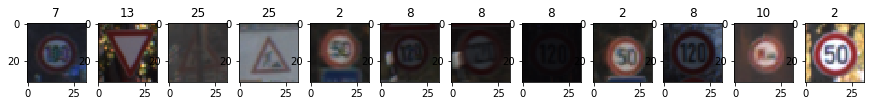

In [6]:
# Visualizations will be shown in the notebook.
%matplotlib inline

# generate set of random random numbers (12) between 0 and max of data
indices = random.sample(range(n_train), 12) #random.randint(0, len(X_train))
#show the training images
print('Training images:', indices)
plt.figure(figsize=(15,15))
for i in range(len(indices)):   
    image = X_train[indices[i]]
    plt.subplot(1, 12, i+1)
    plt.title(y_train[indices[i]])
    plt.imshow(image)
plt.show()

#show the validation images
print('Validation images:', indices)
indices = random.sample(range(n_validation), 12)
plt.figure(figsize=(15,15))
for i in range(len(indices)):
    image = X_valid[indices[i]]
    plt.subplot(1,12,i+1)
    plt.title(y_valid[indices[i]])
    plt.imshow(image)

plt.show()

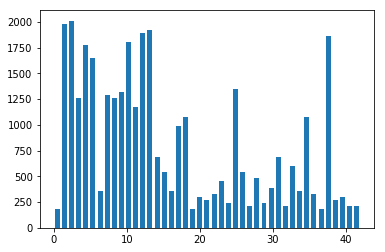

In [7]:
# histogram of label frequency
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


print("Shuffle (X_train, y_train)")
print("X_train.shape=", X_train.shape)
print("y_train.shape=", y_train.shape)

Shuffle (X_train, y_train)
X_train.shape= (34799, 32, 32, 3)
y_train.shape= (34799,)


### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def normalizeMeanStd(img):
    img = img - np.mean(img)
    img = img / np.std(img)
    return img

def normalize128(image):
    #img = (image - 128)/128  equal img = image/128 - 1
    img = np.divide(image, 128)
    image = np.subtract(img,1)    
    return image

In [10]:
X_train_norm = normalize128(X_train[:,])

X_valid_norm = normalize128(X_valid[:,])

#X_test_original = X_test
X_test_norm = normalize128(X_test[:,])


In [11]:
print("After pre-processed the data set:")
print("Image X_train_norm.shape : {}".format(X_train_norm.shape))
print("Image X_valid_norm.shape : {}".format(X_valid_norm.shape))
print("Image X_test_norm.shape  : {}".format(X_test_norm.shape))

print("Labels y_train.shape: {}".format(y_train.shape))
print("Labels y_valid.shape: {}".format(y_valid.shape))
print("Labels y_test.shape : {}".format(y_test.shape))

After pre-processed the data set:
Image X_train_norm.shape : (34799, 32, 32, 3)
Image X_valid_norm.shape : (4410, 32, 32, 3)
Image X_test_norm.shape  : (12630, 32, 32, 3)
Labels y_train.shape: (34799,)
Labels y_valid.shape: (4410,)
Labels y_test.shape : (12630,)


Training gray images[:,:,0]: indices  [32205, 30462, 5057, 2679, 11606, 10066, 26043, 11927, 26257, 1211, 3717, 28654]


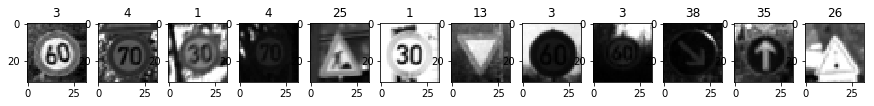

Training gray images[:,:,1]: indices  [32205, 30462, 5057, 2679, 11606, 10066, 26043, 11927, 26257, 1211, 3717, 28654]


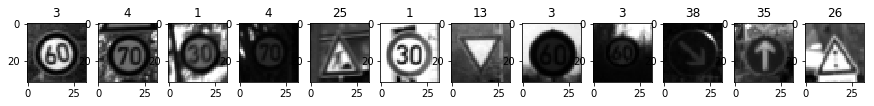

Training gray images[:,:,2]: indices  [32205, 30462, 5057, 2679, 11606, 10066, 26043, 11927, 26257, 1211, 3717, 28654]


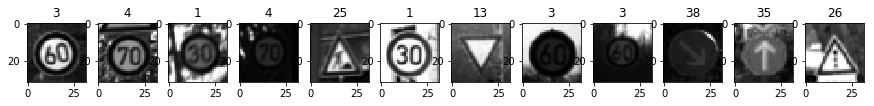

In [12]:

################## Show normalized Train set samples #######################
img_num = 12
# generate set of random random numbers (12) between 0 and max of data
indices = random.sample(range(n_train), img_num) #random.randint(0, len(X_train))

#show the training images
print('Training gray images[:,:,0]: indices ', indices)
plt.figure(figsize=(15,15))
for i in range(len(indices)):   
    plt.subplot(1, img_num, i+1)
    plt.title(y_train[indices[i]])
    plt.imshow(X_train_norm[indices[i]][:,:,0], cmap='gray')
plt.show()


print('Training gray images[:,:,1]: indices ', indices)
plt.figure(figsize=(15,15))
for i in range(len(indices)):   
    plt.subplot(1, img_num, i+1)
    plt.title(y_train[indices[i]])
    plt.imshow(X_train_norm[indices[i]][:,:,1], cmap='gray')
plt.show()


print('Training gray images[:,:,2]: indices ', indices)
plt.figure(figsize=(15,15))
for i in range(len(indices)):   
    plt.subplot(1, img_num, i+1)
    plt.title(y_train[indices[i]])
    plt.imshow(X_train_norm[indices[i]][:,:,2], cmap='gray')
plt.show()
#########################################

### Model Architecture

### SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
#### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since Traffic Sign images are RGB, C is 3 in this case.

#### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

#### Output
Return the result of the 2nd fully connected layer.

In [13]:
img_channel = X_train_norm.shape[3]
print ('img_channel=', img_channel)

EPOCHS = 50
BATCH_SIZE = 128

rate = 0.001

save_modle_dir = './lenet_norm_mean-std-128/'

img_channel= 3


In [14]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32ximg_channel. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, img_channel, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#### Features and Labels
Train LeNet to classify German Traffic Sign data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [15]:
x = tf.placeholder(tf.float32, (None, 32, 32, img_channel))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

print ('x=', x)
print ('y=', y)
print ('one_hot_y=', one_hot_y)

x= Tensor("Placeholder:0", shape=(?, 32, 32, 3), dtype=float32)
y= Tensor("Placeholder_1:0", dtype=int32)
one_hot_y= Tensor("one_hot:0", dtype=float32)


#### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

logits = LeNet(x)
print ('logits.shape=', logits.shape)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

#training_operation = tf.train.AdamOptimizer(learning_rate = rate).minimize(loss_operation)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

logits.shape= (?, 43)


#### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [17]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    #print ('evaluate.logits.shape=', logits.shape)
    return total_accuracy / num_examples

#### Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

"""
Training...

EPOCH 1 ...
Validation Accuracy = 0.816
EPOCH 2 ...
Validation Accuracy = 0.876
EPOCH 3 ...
Validation Accuracy = 0.887
......
EPOCH 48 ...
Validation Accuracy = 0.956
EPOCH 49 ...
Validation Accuracy = 0.956
EPOCH 50 ...
Validation Accuracy = 0.956
Model saved
"""

In [18]:
print ('EPOCHS=', EPOCHS)
print ('learning_rate=', rate)
print ('BATCH_SIZE=', BATCH_SIZE)
print ('X_train normalize samples=', X_train_norm.shape)
print ('Image channels=', img_channel)
print ('batchs=', len(X_train)//BATCH_SIZE)
print ('save_modle_dir=', save_modle_dir)
print ()
print ("Start taining at  11:23     ")

EPOCHS= 50
learning_rate= 0.001
BATCH_SIZE= 128
X_train normalize samples= (34799, 32, 32, 3)
Image channels= 3
batchs= 271
save_modle_dir= ./lenet_norm_mean-std-128/

Start taining at  11:23     


In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            
            #loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
            #if (offset%(BATCH_SIZE*50) == 0):
            #    print('Epoch {:>2}, Batch {:>3} '.format(i+1,(offset//BATCH_SIZE)))
                    
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, save_modle_dir)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.762
EPOCH 2 ...
Validation Accuracy = 0.835
EPOCH 3 ...
Validation Accuracy = 0.872
EPOCH 4 ...
Validation Accuracy = 0.869
EPOCH 5 ...
Validation Accuracy = 0.881
EPOCH 6 ...
Validation Accuracy = 0.895
EPOCH 7 ...
Validation Accuracy = 0.890
EPOCH 8 ...
Validation Accuracy = 0.890
EPOCH 9 ...
Validation Accuracy = 0.913
EPOCH 10 ...
Validation Accuracy = 0.882
EPOCH 11 ...
Validation Accuracy = 0.904
EPOCH 12 ...
Validation Accuracy = 0.909
EPOCH 13 ...
Validation Accuracy = 0.903
EPOCH 14 ...
Validation Accuracy = 0.917
EPOCH 15 ...
Validation Accuracy = 0.911
EPOCH 16 ...
Validation Accuracy = 0.920
EPOCH 17 ...
Validation Accuracy = 0.922
EPOCH 18 ...
Validation Accuracy = 0.924
EPOCH 19 ...
Validation Accuracy = 0.912
EPOCH 20 ...
Validation Accuracy = 0.912
EPOCH 21 ...
Validation Accuracy = 0.915
EPOCH 22 ...
Validation Accuracy = 0.924
EPOCH 23 ...
Validation Accuracy = 0.926
EPOCH 24 ...
Validation Accuracy = 0.914
EPOCH 25 ...

#### Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [20]:
with tf.Session() as sess:
    saver.restore(sess, save_modle_dir)

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

INFO:tensorflow:Restoring parameters from ./lenet_norm_mean-std-128/
Test Accuracy = 0.928


### Random select test images for Evaluate the Model

Test images indices= [10491 11091   951   678   123  3007  8898  7039  2509   829 10906  1558
  8535 10963  3116  3913 10920  7014  6808 11757]
X_test_norm_input.shape= (20, 32, 32, 3)
X_test_norm_input[0].shape= (1, 32, 32, 3)

y_test_input.shape= (20,) [12 16 31 29  8 33  9  7  5 27 38  2 12 38 17 35  2 35 38 31]
Test images:


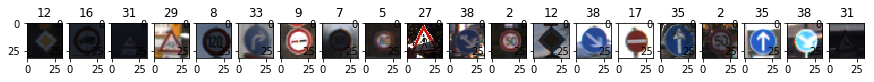

In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img_num = 20
indices = np.random.randint(0, len(X_test_norm), size=img_num)
print ('Test images indices=',indices)

X_test_norm_input = np.array(X_test_norm[indices])
print ('X_test_norm_input.shape=', X_test_norm_input.shape)
print ('X_test_norm_input[0].shape=', X_test_norm_input[:1].shape)
print()

y_test_input = y_test[indices]
print ('y_test_input.shape=', y_test_input.shape, y_test_input)
print('Test images:')
plt.figure(figsize=(15,15))
for i in range(len(indices)):   
    image = X_test[indices[i]]
    plt.subplot(1, img_num, i+1)
    plt.title(y_test[indices[i]])
    plt.imshow(image)
plt.show()

In [22]:

with tf.Session() as sess:
    saver.restore(sess, save_modle_dir)
    print ("\n X_test_norm_input.shape=", type(X_test_norm_input), X_test_norm_input.shape)#, inputX)
    
    output = sess.run(logits, feed_dict={x: X_test_norm_input})
    predicts = sess.run(tf.argmax(output, 1))    
    print("labels :", y_test_input)
    print("predict:", predicts )
    
    predict_num = np.sum(np.equal(y_test_input, predicts))
    print("%d images predict right!" %( predict_num))
    print('Accuracy is {}%'.format((predict_num)/len(y_test_input) *100), 'on the test images.')
        

INFO:tensorflow:Restoring parameters from ./lenet_norm_mean-std-128/

 X_test_norm_input.shape= <class 'numpy.ndarray'> (20, 32, 32, 3)
labels : [12 16 31 29  8 33  9  7  5 27 38  2 12 38 17 35  2 35 38 31]
predict: [12 16 31 29  8 33  9  5  2  1 38  2 12 38 17 35  2 35 38 25]
16 images predict right!
Accuracy is 80.0% on the test images.


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the New Test Images

images_filenames.len= 11 ['.ipynb_checkpoints', 'children.jpg', 'construction.jpg', 'keep right.jpg', 'pedestrian.jpg', 'prioritty.jpg', 'right of way.jpg', 'right.jpg', 'stop.jpg', 'thirty_miles.jpg', 'warning.jpg']
Number of new images:  10


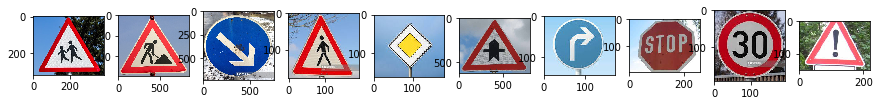

In [23]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os

directory = "./test_images/"
images_filenames = os.listdir(directory)
images_filenames.sort()
print ('images_filenames.len=', len(images_filenames), images_filenames)

test_new_images = []
for i, file in enumerate(images_filenames):
    #print ('%d: %s' % (i, directory + file))
    # It appears that the first file in the directory is some kind of navigation link ... in linux OS
    if (file[0] != '.'): 
        #print ('%d: %s' % (i, directory + file))
        img = plt.imread(directory + file)
        test_new_images.append(img)

# number of new images
print("Number of new images: ", len(test_new_images))
plt.figure(figsize=(15, 15))
for i in range(len(test_new_images)):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_new_images[i])
plt.show()


#### Pre-process the new images
First the images are converted to gray image and then resized to 32x32

In [24]:
test_new_images_gray=[]
for i, image in enumerate(test_new_images):
    img = cv2.resize(image,(32,32))
    if (img_channel == 1):
        img = to_gray(img)
        img = hist_equalize(img)
        img = normalize_image(img)
    else:
        img = normalize128(img)
    test_new_images_gray.append(img)

print("After normalize...test_new_images_gray[0].shape=", test_new_images_gray[0].shape)

"""
plt.figure(figsize=(15, 15))
for i in range(len(test_new_images_gray)):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_new_images_gray[i],cmap='gray')
plt.show()    
"""
#Convert the images list to np array
test_new_images_processed = np.asarray(test_new_images_gray)

# add the channel/depth dimension to each new image
if (img_channel == 1):
    test_new_images_processed = test_new_images_processed[...,None]

print('After channel is added, test_new_images_processed.shape: ',test_new_images_processed.shape)

# labels of the new images
test_new_labels = np.array([28,25,38,27,12,11,33,14,1,18])
print ("len(test_new_labels)=", test_new_labels.shape, test_new_labels)

After normalize...test_new_images_gray[0].shape= (32, 32, 3)
After channel is added, test_new_images_processed.shape:  (10, 32, 32, 3)
len(test_new_labels)= (10,) [28 25 38 27 12 11 33 14  1 18]


### Predict the Sign Type for Each Image

In [25]:
############# The simplest way to predict the test images #################
with tf.Session() as sess:
    saver.restore(sess, save_modle_dir)
    print ("test_new_images_processed.shape=", type(test_new_images_processed), test_new_images_processed.shape)#, inputX)
    
    #output = sess.run(logits, feed_dict={x: X_input[:2]})
    output = sess.run(logits, feed_dict={x: test_new_images_processed})
    #print ('Output=', output) 
    predict_index = sess.run(tf.argmax(output, 1))
    print("y lables :", test_new_labels)
    print("predicts :", predict_index )
    
    predict_num = np.sum(np.equal(test_new_labels, predict_index))
    print("%d images predict right!" %( predict_num))
    print('Accuracy is {}%'.format((predict_num)/len(test_new_labels) *100), 'on the test images.')
        

INFO:tensorflow:Restoring parameters from ./lenet_norm_mean-std-128/
test_new_images_processed.shape= <class 'numpy.ndarray'> (10, 32, 32, 3)
y lables : [28 25 38 27 12 11 33 14  1 18]
predicts : [28 25  1 11 12 11 33 14  1 18]
8 images predict right!
Accuracy is 80.0% on the test images.


In [26]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
def get_predictions(img_data, label_data):
    ''' Takes input image data and corresponding label data
        and computes prediction 
        Returns list of predictions
    '''
    print('Prediction started ...')
    predictions = []
    with tf.Session() as sess:
        saver.restore(sess, save_modle_dir)  # restore the session already saved
        for i in range(len(img_data)):
            # get prediction for each image (consider a single image as a batch)
            batch_x, batch_y = [img_data[i]], [label_data[i]]
            prediction = sess.run(accuracy_operation, feed_dict={x:batch_x, y:batch_y})
            predictions.append(prediction)
    return predictions

# get the predictions for the new test images
predicts = get_predictions(test_new_images_processed, test_new_labels)
#predicts = get_predictions(X_test_norm, y_test)
print('Test image | prediction ')
print('--------------------------')
print('length of test:',len(predicts))
print('----Test completed -----')
for i in range(len(predicts)):
    print(' image_{} | {:.1f}'.format(i+1, predicts[i]))


Prediction started ...
INFO:tensorflow:Restoring parameters from ./lenet_norm_mean-std-128/
Test image | prediction 
--------------------------
length of test: 10
----Test completed -----
 image_1 | 1.0
 image_2 | 1.0
 image_3 | 0.0
 image_4 | 0.0
 image_5 | 1.0
 image_6 | 1.0
 image_7 | 1.0
 image_8 | 1.0
 image_9 | 1.0
 image_10 | 1.0


### Analyze Performance

In [27]:
### Calculate the accuracy for these 10 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

test_accuracy = np.sum(predicts)*100/len(predicts)
print('Accuracy is {}%'.format(test_accuracy), 'on the test images.')


Accuracy is 80.0% on the test images.


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [28]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

top_k = 5
probabilities=[]

with tf.Session() as sess:
    saver.restore(sess, save_modle_dir)  # restore the session already saved
    for i in range(len(test_new_images_processed)):
        softmax = tf.nn.softmax(logits)
        top_five = tf.nn.top_k(softmax, k = top_k)
        
        # get prediction for each image (consider a single image as a batch)
        batch_x = [test_new_images_processed[i]]
        probability = sess.run(top_five, feed_dict={x:batch_x})
        probabilities.append(probability)

idx = 0 
for prob in probabilities:
    labels = prob.indices
    probs = prob.values
    
    print((idx+1),'True sign: label', test_new_labels[idx], '-', id_to_name[test_new_labels[idx]])
    #print('    ---------')
    for i in range(len(labels[0])):
        print('  Predict. sign {}:'.format(i+1), '{:.2f} % '.format(probs[0][i]*100), '{}-'.format(labels[0][i]),
              '{}'.format(id_to_name[labels[0][i]]))
    
    if test_new_labels[idx] !=labels[0][0]:
        print('   --------------------------------')
        print('  INCORRECT classification')
    idx += 1
    print('-------------------------------------')
##############


INFO:tensorflow:Restoring parameters from ./lenet_norm_mean-std-128/
1 True sign: label 28 - Children crossing
  Predict. sign 1: 100.00 %  28- Children crossing
  Predict. sign 2: 0.00 %  23- Slippery road
  Predict. sign 3: 0.00 %  18- General caution
  Predict. sign 4: 0.00 %  35- Ahead only
  Predict. sign 5: 0.00 %  20- Dangerous curve to the right
-------------------------------------
2 True sign: label 25 - Road work
  Predict. sign 1: 100.00 %  25- Road work
  Predict. sign 2: 0.00 %  24- Road narrows on the right
  Predict. sign 3: 0.00 %  22- Bumpy road
  Predict. sign 4: 0.00 %  23- Slippery road
  Predict. sign 5: 0.00 %  0- Speed limit (20km/h)
-------------------------------------
3 True sign: label 38 - Keep right
  Predict. sign 1: 100.00 %  1- Speed limit (30km/h)
  Predict. sign 2: 0.00 %  38- Keep right
  Predict. sign 3: 0.00 %  40- Roundabout mandatory
  Predict. sign 4: 0.00 %  37- Go straight or left
  Predict. sign 5: 0.00 %  0- Speed limit (20km/h)
   ---------

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [29]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")